In [115]:
##예제
#1. csv 폴더에 있는 파일 4개 로드 (tran_1, tran_2, trand_d_1, trand_d_2 )
#2. tran_1, tran_d_2 단순하게 행을 추가 결합 (tran)
#3. tran_d_1, tran_d_2  단순하게 행을 추가 결합 (tran_d)
#4. 2번 3번 과정에서 결합한 데이터 프레임을 특정조건에 맞워서 left(tran)를 기준으로 열결합 (transaction)

In [116]:
import pandas as pd

In [117]:
tran_1 = pd.read_csv('../csv/tran_1.csv')
tran_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [118]:
tran_2 = pd.read_csv('../csv/tran_2.csv')
tran_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [119]:
tran_d_1 = pd.read_csv('../csv/tran_d_1.csv')
tran_d_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [120]:
tran_d_2 = pd.read_csv('../csv/tran_d_2.csv')
tran_d_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [121]:
#파일 한번에 불러오기


In [122]:
#단순하게 행결합
tran = pd.concat([tran_1, tran_2], axis=0, ignore_index=True)


In [123]:
tran_d = pd.concat([tran_d_1, tran_d_2], axis=0, ignore_index=True)

In [124]:
tran.head(1)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502


In [125]:
tran_d.head(1)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1


In [126]:
#특정 조건에 맞춰서 tran을 기준으로 열 추가
#특정 조건 (transaction_id)
#how (lfet = tran)
transaction = pd.merge(
    left = tran, 
    right = tran_d,
    on = 'transaction_id',
    how = 'left'
)

In [127]:
transaction.head()

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2


In [128]:
#데이터 결합2
#1. 파일로드(customer_master, item_master)
#2. 1번 과정에서 불러온 2개의 데이터프레임을  transaction에 조건에 맞게 조인결합U(merge)
#3. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼을 total_price 새로운 컬럼 추가(quantity * item_price)
#4. payment_date 컬럼을 시계열 데이터로 변경

In [129]:
customer_master = pd.read_csv('../csv/customer_master.csv')
customer_master.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [130]:
item_master = pd.read_csv('../csv/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [131]:
# transaction, customer_master 의 특정조건으로 결합
# 조건 - customer_id
join_data = pd.merge(
    transaction,
    customer_master,
    on = 'customer_id', # 기준이 되는 값은 중복되는값
    how = 'left'
)

In [132]:
join_data.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0


In [133]:
item_master.head(1)

,item_id,item_name,item_price
0,S001,PC-A,50000


In [134]:
total_df = pd.merge(
    join_data,
    item_master,
    on = 'item_id',
    how ='left'
)

In [135]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000


In [136]:
total_df['total_price'] = total_df['quantity'] * total_df['item_price']

In [137]:
total_df.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000


In [140]:
total_df['payment_date'] = pd.to_datetime(
    total_df['payment_date'],
    format = '%Y-%m-%d %H:%M:%S') #시계열은 특정부분만 추출해서 데이터 만들수 있음

In [141]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7144 non-null   object        
 1   price           7144 non-null   int64         
 2   payment_date    7144 non-null   datetime64[ns]
 3   customer_id     7144 non-null   object        
 4   detail_id       7144 non-null   int64         
 5   item_id         7144 non-null   object        
 6   quantity        7144 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   float64       
 14  item_name       7144 non-null   object        
 15  item

In [144]:
## 시계열 데이터에서 년도와 월 부분만 따로 추출 -> payment_month 컬럼 생성 (파생변수 생성)
#####[].dt.strftime('%Y')
#('%Y년%m월') :데이터 형태를 내마음대로 바꿀 수 있음

total_df['payment_month'] = total_df['payment_date'].dt.strftime('%Y-%m')

In [145]:
## 그룹화 예제
# 1. payment_month 를 기준으로 그룹화
# 2. total_price의 합계, price의 합계를 출력
# 3. 2개의 합계를 matplotlib을 이용하여 라인그래프로 시각화(subplot)이용

In [156]:
#그룹화(payment_month)를 기준

#case 1
total_df.groupby('payment_month').sum()[['price', 'total_price']]

#case 2
total_df.groupby('payment_month').sum().loc[:, ['price','total_price']] #:, 처음부터 끝을 다 보여주겠다

#case 3
total_df.groupby('payment_month').sum().iloc[:, [0,5]]

C:\Users\kyu11\AppData\Local\Temp\ipykernel_23056\2641008129.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df.groupby('payment_month').sum()[['price', 'total_price']]
C:\Users\kyu11\AppData\Local\Temp\ipykernel_23056\2641008129.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df.groupby('payment_month').sum().loc[:, ['price','total_price']] #:, 처음부터 끝을 다 보여주겠다
C:\Users\kyu11\AppData\Local\Temp\ipykernel_23056\2641008129.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify nume

,price,total_price
payment_month,,
2019-02,179190000,160185000
2019-03,175375000,160370000
2019-04,176720000,160510000
2019-05,171385000,155420000
2019-06,183395000,164030000
2019-07,188685000,170620000


In [157]:
group_data = total_df.groupby('payment_month').sum()[['price', 'total_price']]


C:\Users\kyu11\AppData\Local\Temp\ipykernel_23056\849990181.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = total_df.groupby('payment_month').sum()[['price', 'total_price']]


In [163]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [164]:
import matplotlib.pyplot as plt

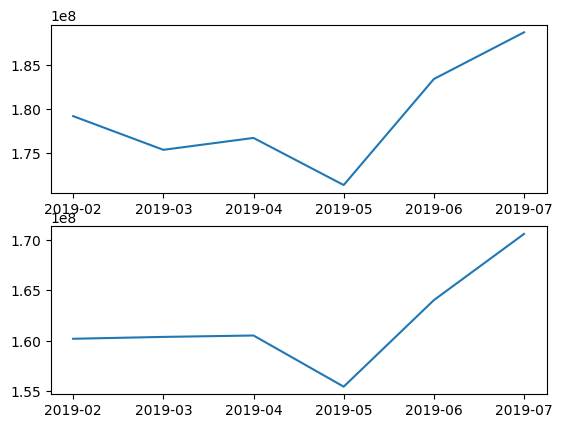

In [165]:
# 라인 그래프 시각화
## subplot를 이용해 그래프 2개 생성
plt.subplot(2, 1, 1)
plt.plot(group_data['price'])
plt.subplot(2, 1, 2)
plt.plot(group_data['total_price'])
plt.show()